**Import libraries / Dependencies**

In [ ]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# to avoide encoding error, use unicode escape

df = pd.read_csv('/content/Diwali Sales Data.csv', encoding = 'unicode_escape')

In [ ]:
# shows the total number of rows and columns in a dataframe

df.shape

(11251, 15)

In [ ]:
# print the first 5 rows from your dataframe by default

df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


**Data Cleaning**

In [ ]:
# Give more information about your dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# drop unrelated/black columns

df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [ ]:
# check for null values

pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
# remove/drop null values

df.dropna(inplace=True)

In [ ]:
# Changing the datatype of a particular column of a dataframe

df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
# To get description of the data in the dataframe (i.e, mean,count,std, etc)

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [ ]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


**Exploratory Data Analysis (EDA)**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

**Gender**

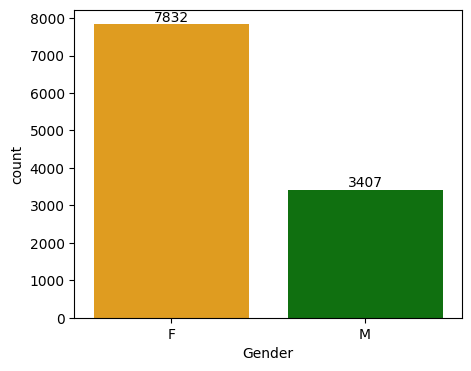

In [ ]:
# define a color palette for the genders
gender_palette = {'F':'orange','M':'green'}

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(5, 4))

# create the countplot to see the distribution of data
cp = sns.countplot(x='Gender', data=df, palette= gender_palette, hue='Gender', legend=False)

# add lebels to the bars
for bars in cp.containers:
  cp.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

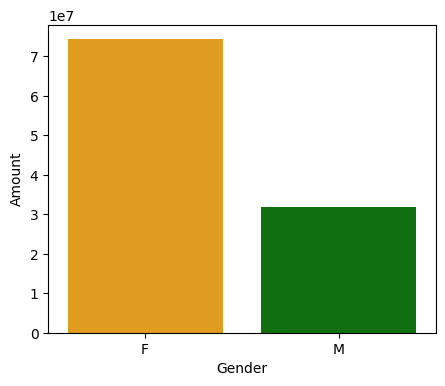

In [ ]:
# define a color palette for the genders
gender_palette = {'F':'orange','M':'green'}

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(5, 4))

# grouping my gender column based on amount column
bp = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# creating a bar plot
sns.barplot(x='Gender',y='Amount',data=bp, palette= gender_palette, hue='Gender', legend=False)


***From the above graphs we can see that the most of the buyers are females and even have greater purchasing power than man***

**Age Group**

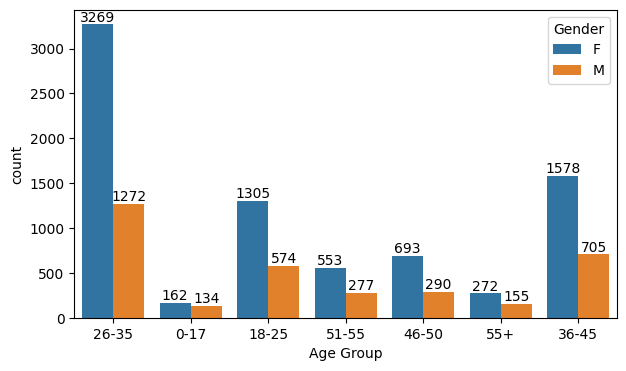

In [ ]:
# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(7, 4))

# create the countplot to see the distribution of data
cp = sns.countplot(x='Age Group', data=df, hue='Gender')

# add lebels to the bars
for bars in cp.containers:
  cp.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

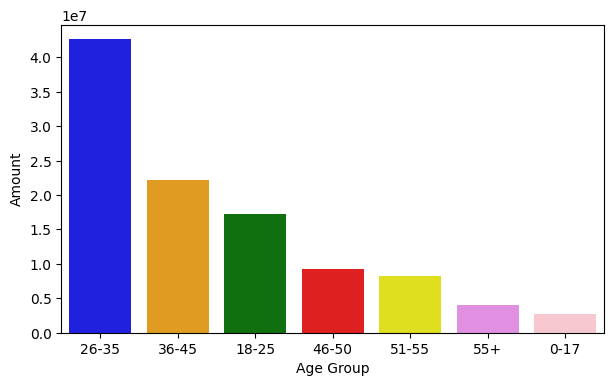

In [ ]:
# define a color palette for the age groups
age_palette = {'26-35':'blue','36-45':'orange','18-25':'green','46-50':'red','51-55':'yellow','55+':'violet','0-17':'pink'}

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(7, 4))

# grouping my age group column based on amount column
bp = df.groupby(['Age Group'],as_index=False) ['Amount'].sum().sort_values(by='Amount',ascending=False)

# creating a bar plot
sns.barplot(x='Age Group',y='Amount',data=bp, palette=age_palette, hue='Age Group', legend=False)

***From above graphs we can see that the most of the buyers are from the age group of 26-35 and are women***

**State**

<Axes: xlabel='State', ylabel='Orders'>

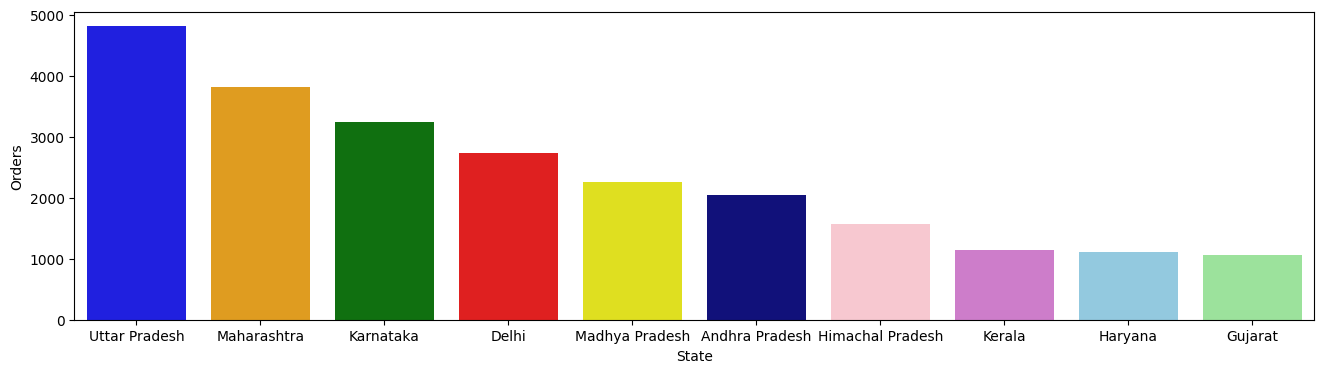

In [ ]:
# total number of orders from top 10 states

# define a color palette for the states
states = ['blue','orange','green','red','yellow','darkblue','pink','orchid','skyblue','lightgreen']

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(16, 4))

# grouping my state column based on orders column
bp = df.groupby(['State'],as_index=False) ['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

# creating a bar plot
sns.barplot(x='State',y='Orders',data=bp, palette=states, hue='State', legend=False)

<Axes: xlabel='State', ylabel='Amount'>

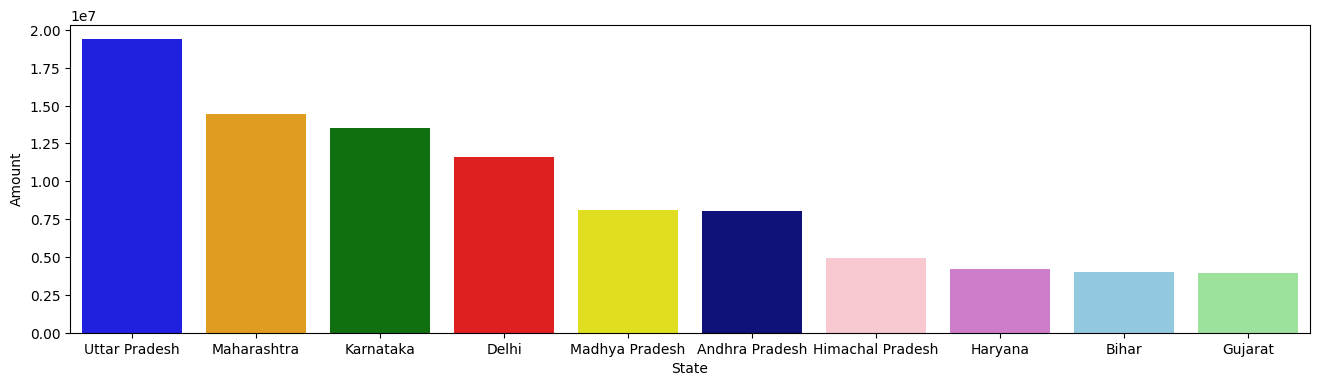

In [ ]:
# total amount/sales from top 10 states

# define a color palette for the states
states = ['blue','orange','green','red','yellow','darkblue','pink','orchid','skyblue','lightgreen']

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(16, 4))

# grouping my state column based on amount column
bp = df.groupby(['State'],as_index=False) ['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

# creating a bar plot
sns.barplot(x='State',y='Amount',data=bp, palette=states, hue='State', legend=False)

***From the above graph we can see that the most of the orders and maximum sales are from the state of UP, Maharashtra, Karnataka, respectively***

**Marital Status**

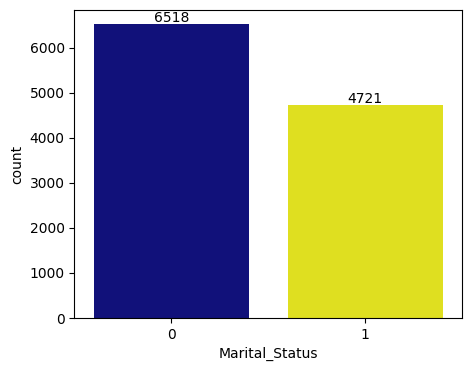

In [ ]:
# define a color palette
marital = ['darkblue','yellow']

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(5, 4))

# create the countplot to see the distribution of data
cp = sns.countplot(x='Marital_Status', data=df, palette=marital, hue='Marital_Status', legend=False)

# add lebels to the bars
for bars in cp.containers:
  cp.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

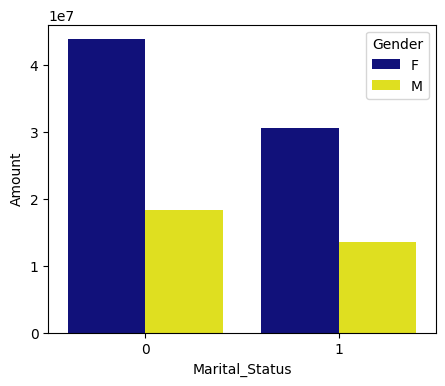

In [ ]:
# define a color palette
marital = ['darkblue','yellow']

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(5, 4))

# grouping my marital_status column based on amount column
bp = df.groupby(['Marital_Status','Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# creating a bar plot
sns.barplot(x='Marital_Status',y='Amount',data=bp, palette= marital, hue='Gender')


***From the above graph we can see that most of the buyers are married(women) and have high purchasing powe***r

**Occupation**

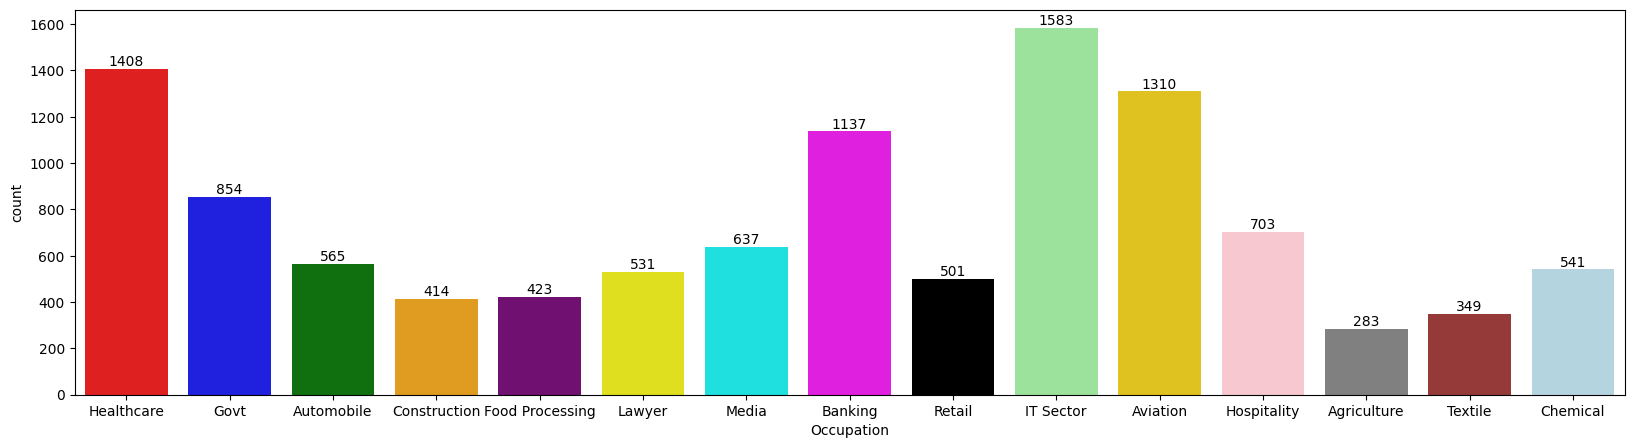

In [ ]:
# define a color palette for the occupations
occup = ['red','blue','green','orange','purple','yellow','cyan','magenta','black','lightgreen','gold','pink','gray','brown','lightblue']

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(20, 5))

# create the countplot to see the distribution of data
cp = sns.countplot(x='Occupation', data=df, palette=occup, hue='Occupation', legend=False)

# add lebels to the bars
for bars in cp.containers:
  cp.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

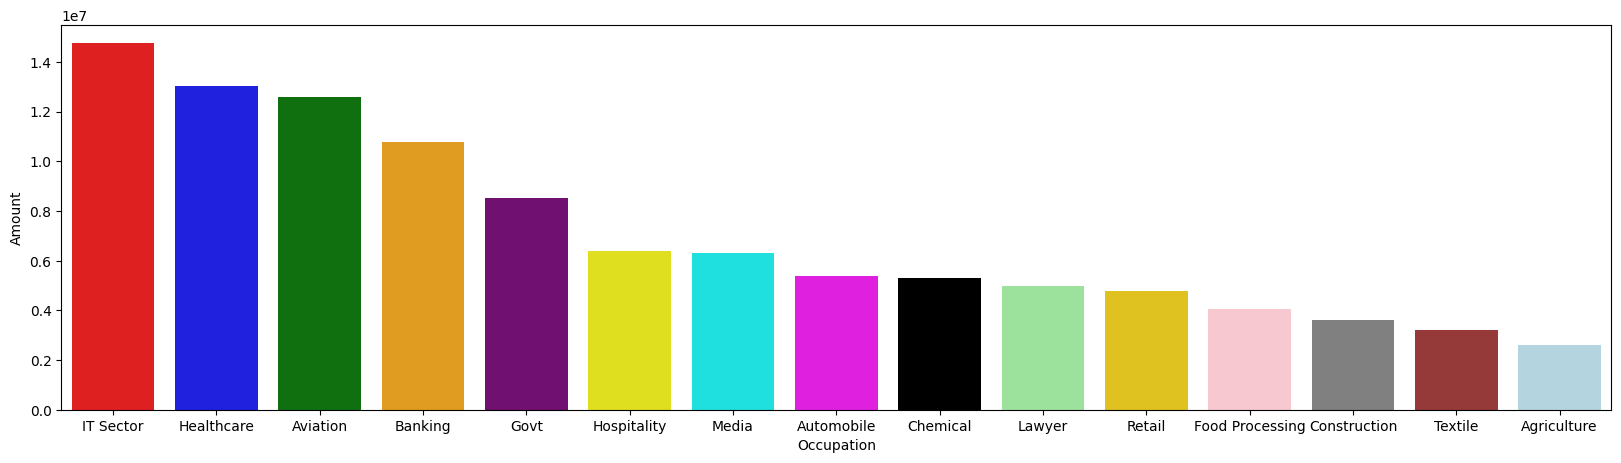

In [ ]:
# define a color palette for the occupations
occup = ['red','blue','green','orange','purple','yellow','cyan','magenta','black','lightgreen','gold','pink','gray','brown','lightblue']

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(20, 5))

# grouping my occupation column based on amount column
bp = df.groupby(['Occupation'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)

# creating a bar plot
sns.barplot(x='Occupation',y='Amount',data=bp, palette= occup, hue='Occupation', legend=False)

***From the above graphs we can see that most of buyers are woring in IT Sector, Healthcare, Aviation, repectivel***y

**Product Category**

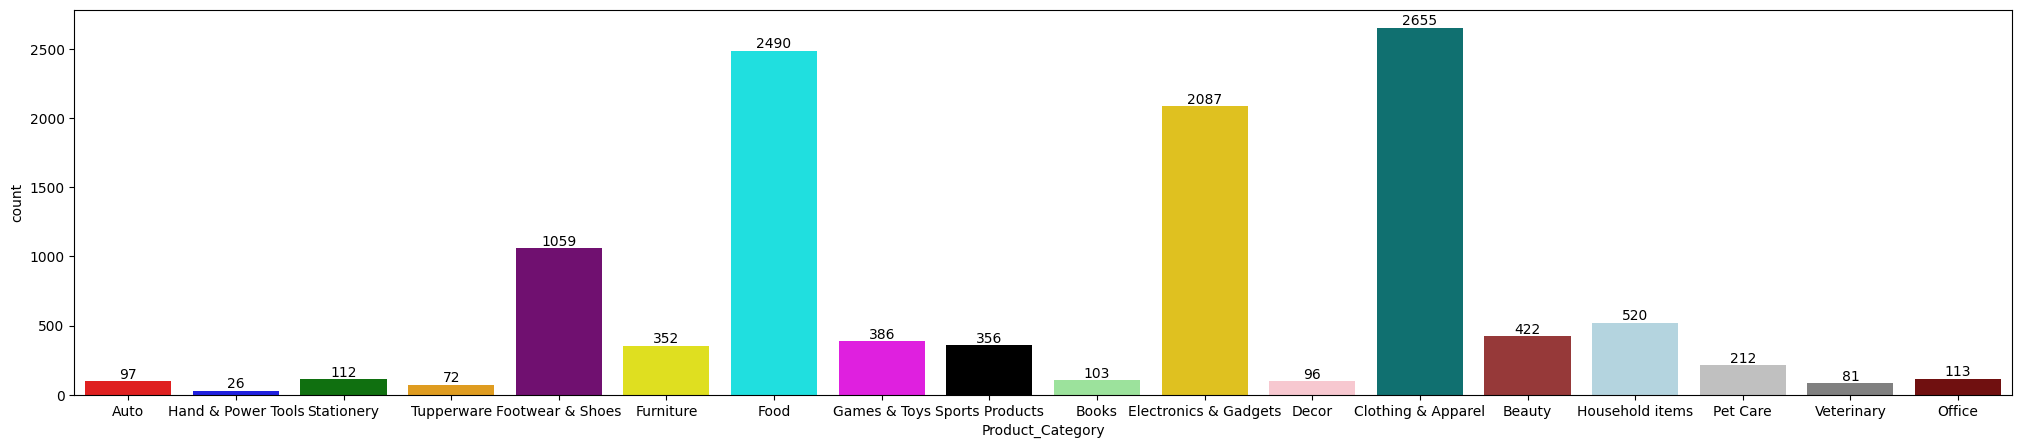

In [ ]:
# define a color palette for the category
category = ['red','blue','green','orange','purple','yellow','cyan','magenta','black','lightgreen','gold','pink','teal','brown','lightblue','silver','gray','maroon']

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(25, 5))

# create the countplot to see the distribution of data
cp = sns.countplot(x='Product_Category', data=df, palette=category, hue='Product_Category', legend=False)

# add lebels to the bars
for bars in cp.containers:
  cp.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

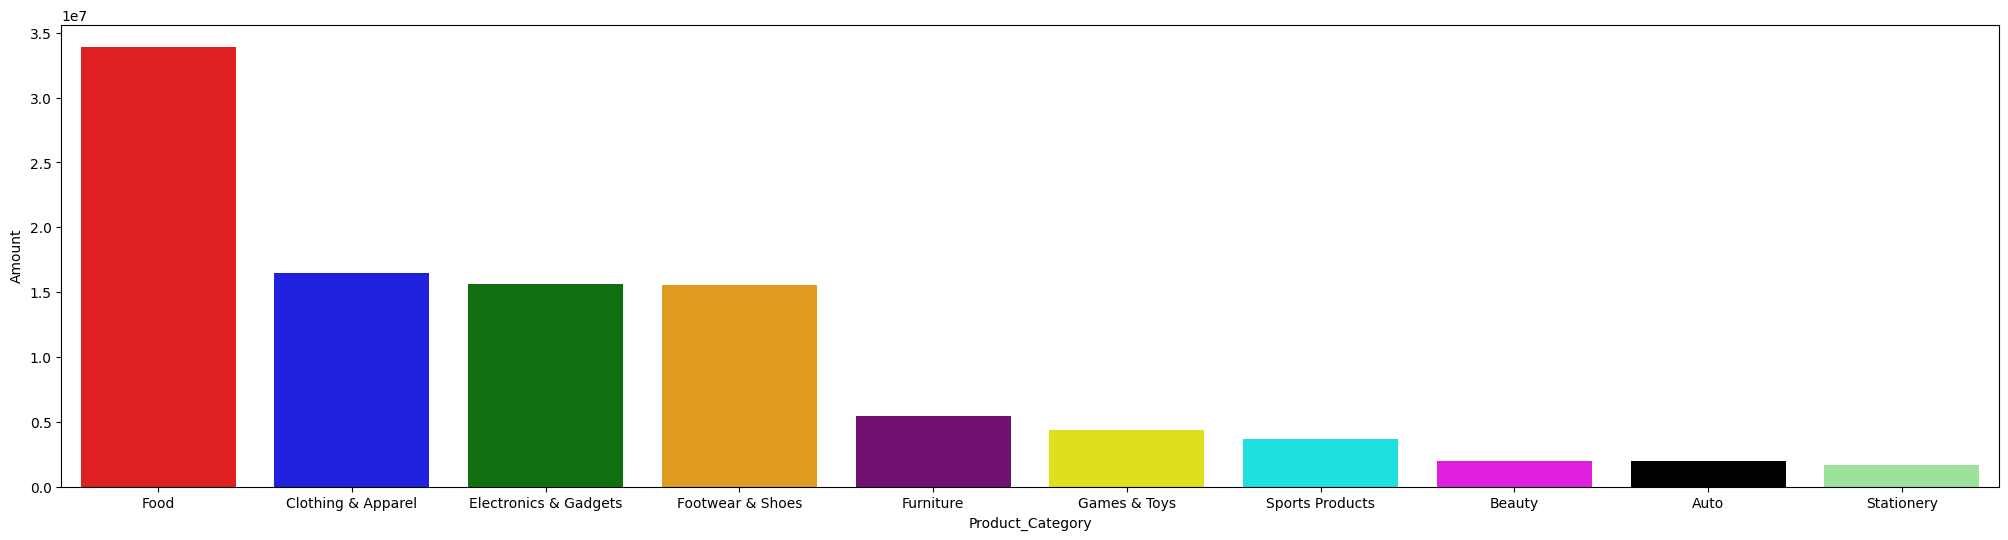

In [ ]:
# define a color palette for the category
category = ['red','blue','green','orange','purple','yellow','cyan','magenta','black','lightgreen']

# Set the size of the plot (Adjust width and height as needed)
plt.figure(figsize=(25, 6))

# grouping my category column based on amount column
bp = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

# creating a bar plot
sns.barplot(x='Product_Category',y='Amount',data=bp, palette= category, hue='Product_Category', legend=False)

***From the above graphs we can see that most of the sold products are Food, Clothing & Apparel , Electronocs & Gadgets, respectively***

**Conclusions :**

***Married women, age group 26-35 yrs from UP, Maharastra and Karnataka working in IT Sector, Healthcare and Aviation are more likely to buy products from Food,Clothing and Electronics category***